In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('salary.txt', sep='\s+')
df_95 = df[df['year'] == 95].copy()

In [62]:
df.head()

,case,id,sex,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19792 entries, 0 to 19791
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case     19792 non-null  int64  
 1   id       19792 non-null  int64  
 2   sex      19792 non-null  object 
 3   deg      19792 non-null  object 
 4   yrdeg    19792 non-null  int64  
 5   field    19792 non-null  object 
 6   startyr  19792 non-null  int64  
 7   year     19792 non-null  int64  
 8   rank     19788 non-null  object 
 9   admin    19792 non-null  int64  
 10  salary   19792 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 1.7+ MB


In [72]:
df.isnull().sum()

case       0
id         0
sex        0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       4
admin      0
salary     0
dtype: int64

In [3]:
cat_vars = ['field', 'rank']
num_vars = ['yrdeg', 'startyr', 'salary']

In [49]:
print("--- Summary Statistics (Aggregate) ---")
print(df_95[num_vars].describe().round(2))

--- Summary Statistics (Aggregate) ---
         yrdeg  startyr    salary
count  1597.00  1597.00   1597.00
mean     76.09    81.12   6389.81
std       9.86     9.99   2036.77
min      48.00    48.00   3042.00
25%      69.00    73.00   4743.00
50%      76.00    83.00   5962.00
75%      84.00    90.00   7602.00
max      96.00    95.00  14464.00


In [45]:
print("\n--- Averages Stratified by Sex ---")
print(df_95.groupby('sex')[num_vars].mean())


--- Averages Stratified by Sex ---
         yrdeg    startyr       salary
sex                                   
F    81.107579  85.474328  5396.908301
M    74.368687  79.615320  6731.639783


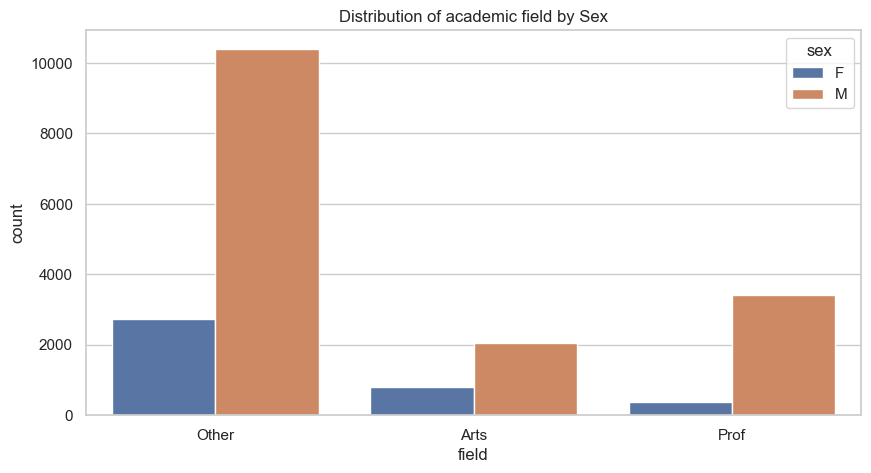

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='field', hue='sex')
plt.title(f'Distribution of academic field by Sex')
plt.show()

In [37]:
# Numeric Summary for Academic field 
gender_totals = df['sex'].value_counts().to_dict()
GenderField_df = df.groupby(['field', 'sex']).size().reset_index()
GenderField_df = GenderField_df.rename(columns={0: 'count'})

GenderField_df['total_sex'] = GenderField_df['sex'].map(gender_totals)
GenderField_df['percentage'] = (GenderField_df['count'] / GenderField_df['total_sex']) * 100

summary = GenderField_df[['field', 'sex', 'percentage']].copy()
summary['percentage'] = summary['percentage'].round(2)

print("\n--- Percentage of Each Sex in Given Fields ---")
print(summary.to_string(index=False))


--- Percentage of Each Sex in Given Fields ---
field sex  percentage
 Arts   F       20.43
 Arts   M       12.85
Other   F       69.66
Other   M       65.60
 Prof   F        9.91
 Prof   M       21.56


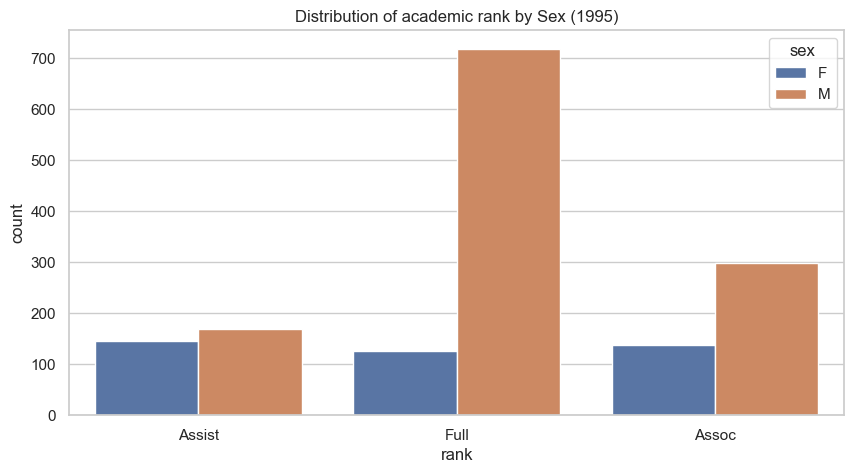

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_95, x='rank', hue='sex')
plt.title(f'Distribution of academic rank by Sex (1995)')
plt.show()

In [43]:
# Numeric Summary for Academic Rank
gender_totals = df['sex'].value_counts().to_dict()
GenderRank_df = df.groupby(['rank', 'sex']).size().reset_index()
GenderRank_df = GenderRank_df.rename(columns={0: 'count'})

GenderRank_df['total_sex'] = GenderRank_df['sex'].map(gender_totals)
GenderRank_df['percentage'] = (GenderRank_df['count'] / GenderRank_df['total_sex']) * 100

summary = GenderRank_df[['rank', 'sex', 'percentage']].copy()
summary['percentage'] = summary['percentage'].round(2)

print("\n--- Percentage of Each Sex in Given Rank ---")
print(summary.to_string(index=False))


--- Percentage of Each Sex in Given Rank ---
  rank sex  percentage
Assist   F       37.19
Assist   M       16.31
 Assoc   F       37.32
 Assoc   M       31.92
  Full   F       25.50
  Full   M       51.75


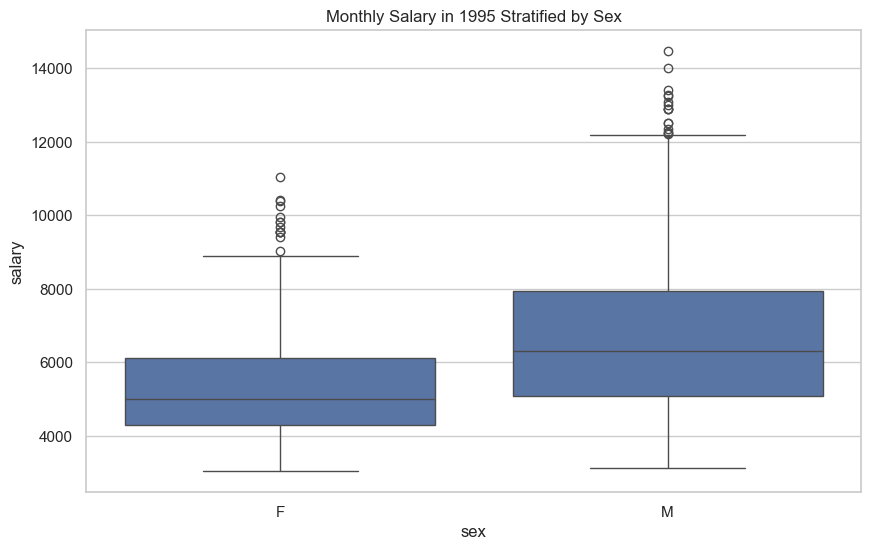

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_95, x='sex', y='salary')
plt.title('Monthly Salary in 1995 Stratified by Sex')
plt.show()

In [48]:
# Numeric Summary for Monthly Salary
print("\n--- Monthly Salary Distribution by Sex Summary ---")
df.groupby(['sex'])['salary'].describe().round(2)


--- Monthly Salary Distribution by Sex Summary ---


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,3926.0,4185.46,1523.38,1267.0,3152.75,3996.0,4951.0,11036.0
M,15866.0,4854.54,2064.17,1200.0,3322.00,4505.0,6040.0,14464.0


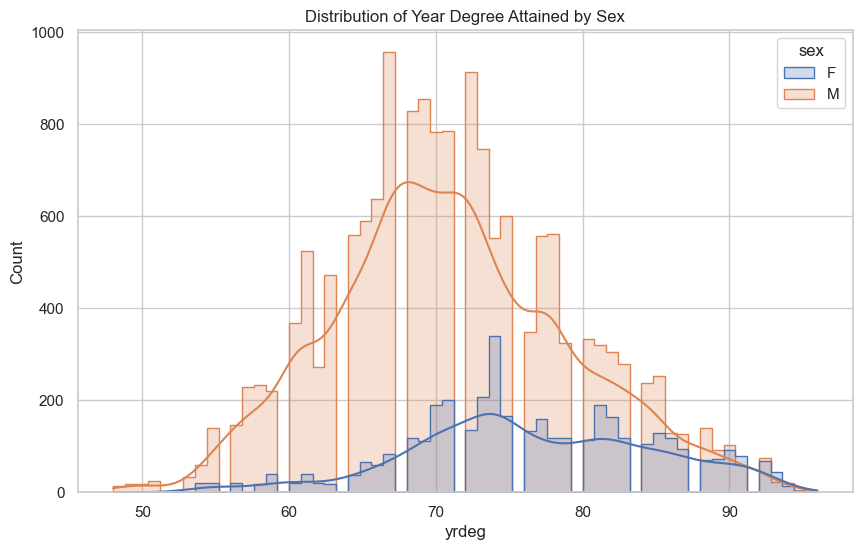

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yrdeg', hue='sex', kde=True, element="step")
plt.title('Distribution of Year Degree Attained by Sex')
plt.show()

In [56]:
# Numeric Summary for Degree Attained
print("\n--- Year Degree Attained Distribution by Sex Summary ---")
df.groupby(['sex'])['yrdeg'].describe().round(1)


--- Year Degree Attained Distribution by Sex Summary ---


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,3926.0,76.6,8.3,54.0,71.0,76.0,83.0,95.0
M,15866.0,71.0,8.2,48.0,66.0,70.0,76.0,96.0


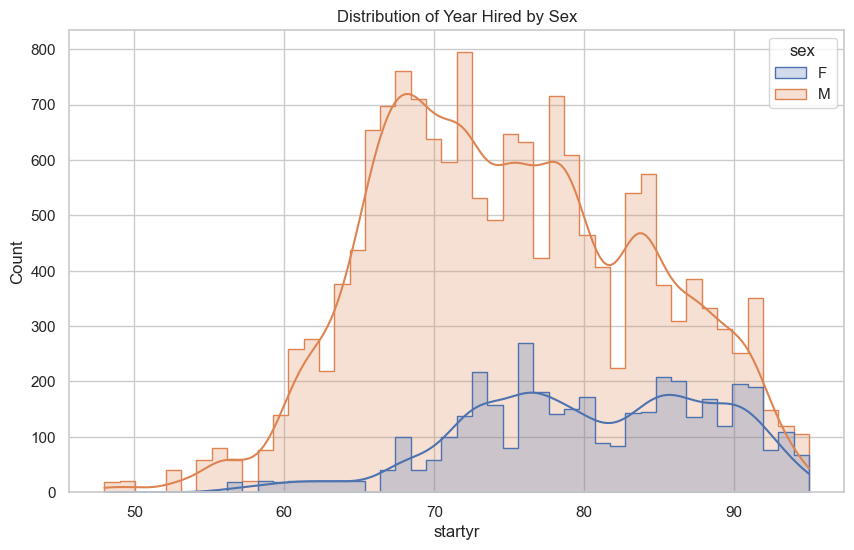

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='startyr', hue='sex', kde=True, element="step")
plt.title('Distribution of Year Hired by Sex')
plt.show()

In [57]:
# Numeric Summary for Year Hired
print("\n--- Year Hired Distribution by Sex Summary ---")
df.groupby(['sex'])['startyr'].describe().round(1)


--- Year Hired Distribution by Sex Summary ---


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,3926.0,80.4,8.1,57.0,74.0,80.0,87.0,95.0
M,15866.0,75.0,8.8,48.0,68.0,74.0,82.0,95.0
